## Load the dataset

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [172]:
df = pd.read_csv('https://raw.githubusercontent.com/Zwelious/DM_W2/refs/heads/main/diabetes.csv')

df.head()

# Load datasaet dari url dan menampilkan 5 baris teratas

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis

In [173]:
df.info()

# Menampilkan info dari dataset, dari sini kita bisa tahu bahwa dataset ini tidak memiliki null values karena range index 768 entries dan non null tiap kolom juga 768

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [174]:
df.describe()

# Menampilkan overview dari dataset, kita bisa tahu jumlah, rata2, std, min, max, q1, q3 pada setiap kolom

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


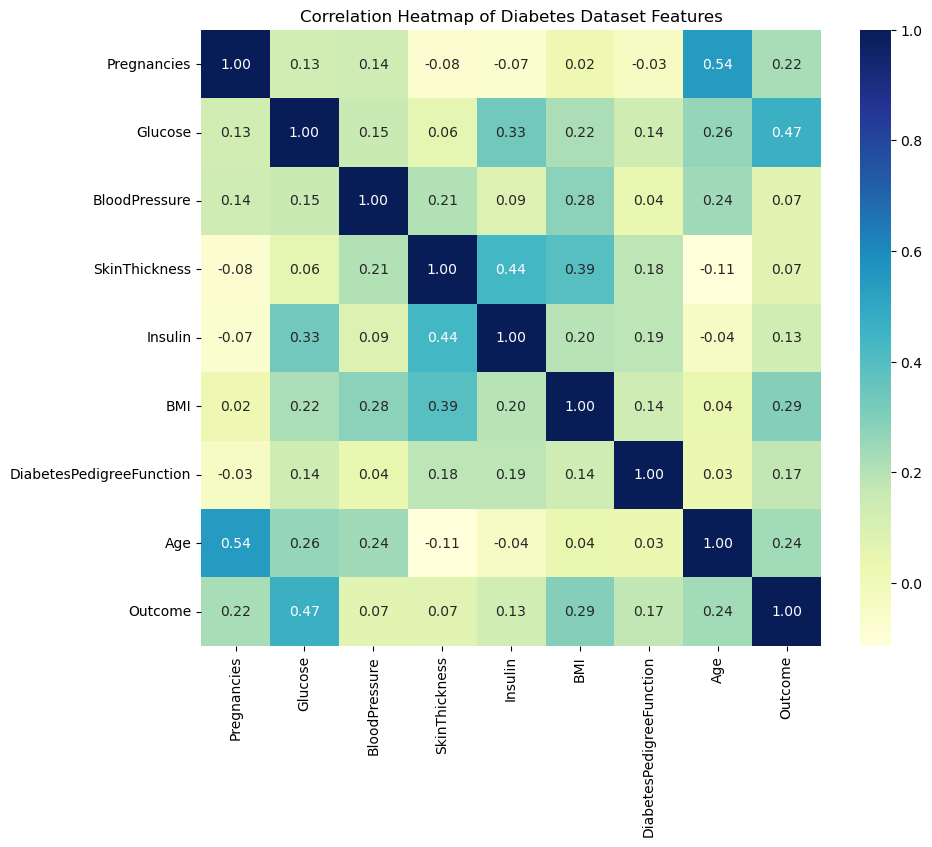

In [175]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap of Diabetes Dataset Features")
plt.show()

# Heatmap yang menampilkan korelasi antar setiap kolom, dari hasil heatmap diatas, kita bisa tahu bahwa kolom yang paling berpengaruh untuk outcome adalah glucose, menunjukkan bahwa glucose merupakan faktor terbesar diabetes.

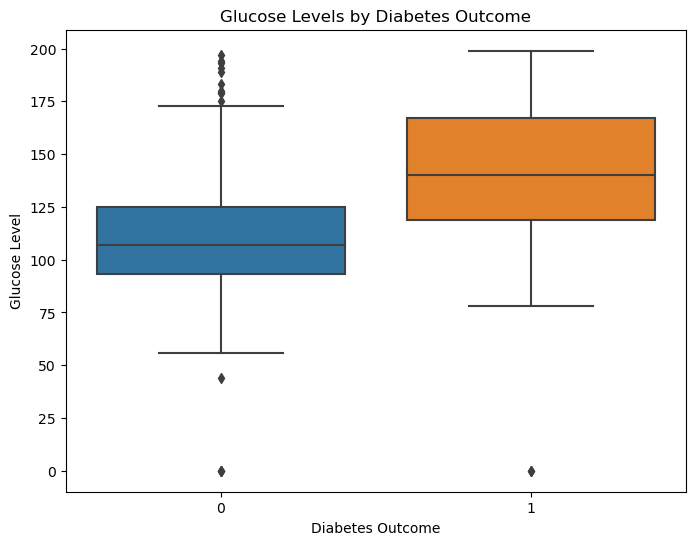

In [176]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose Levels by Diabetes Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Glucose Level")
plt.show()

# Boxplot yang menunjukkan perbandingan jumlah glukosa antara orang yang menderita diabetes dan yang tidak, dari hasilnya kita bisa lihat bahwa orang yang menderita diabetes memiliki kadar glukosa yang lebih tinggi.


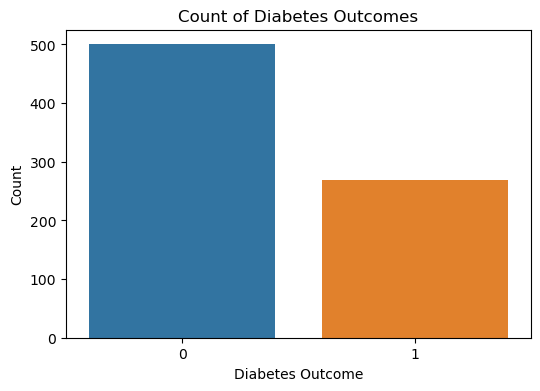

In [177]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title("Count of Diabetes Outcomes")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Count")
plt.show()

# Menampilkan perbandingan orang yang menderita diabetes dan yang tidak, dari keseluruhan data, lebih banyak orang yang tidak terkena diabetes.


In [178]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

# Membagi dataset menjadi X dan y, dimana X adalah kolom selain target (outcome) dan y adalah kolom targetnya (outcome)

In [179]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# Membagi data 20 persen untuk test, 80 persen untuk train, bisa dilihat dalam shape, train memiliki 614 baris dan test memiliki 154 baris

Shape of X_train: (614, 8)
Shape of X_test: (154, 8)


### Entropy

In [180]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth= 3, random_state=42)
clf_entropy.fit(X_train, y_train)

# Membuat clasifier entropy untuk decision tree dengan max depth 3 agar tidak terlalu panjang

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [181]:
y_pred_entropy = clf_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f'Accuracy with Entropy: {accuracy_entropy:.4f}')

# Memasukkan y kedalam entropy untuk diprediksi dengan menggunakan model entropy dan akurasi dari model ini adalah 77% 

Accuracy with Entropy: 0.7662


In [182]:
train_set_score_en = clf_entropy.score(X_train, y_train)
test_set_score_en = clf_entropy.score(X_test, y_test)

print(f'Training set score with Entropy : {train_set_score_en}')
print(f'Test set score with Entropy : {test_set_score_en}')

# Melihat score train dan test, dari hasilnya, gap yang dimiliki antara train dengan test tidak jauh sehingga termasuk well-fitted

Training set score with Entropy : 0.7752442996742671
Test set score with Entropy : 0.7662337662337663


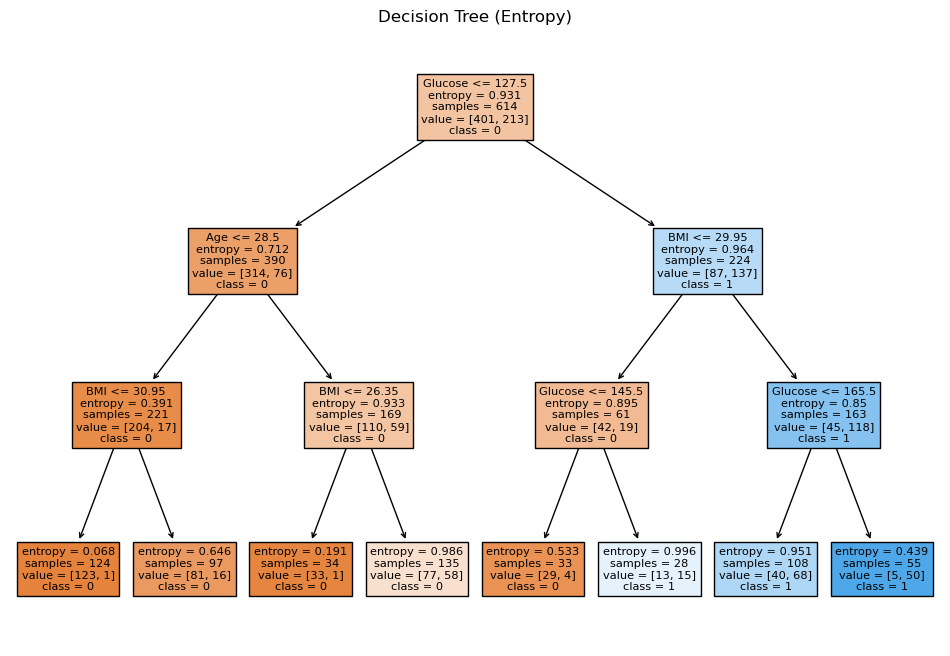

In [183]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_entropy, 
                feature_names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"], 
                class_names=['0', '1'],
                filled=True)
plt.title("Decision Tree (Entropy)")
plt.show()

# Hasil decision tree menggunakan entropy

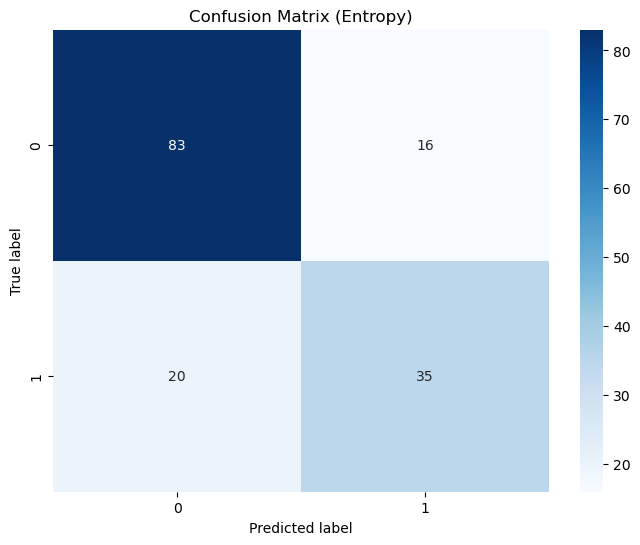

In [184]:
cm = confusion_matrix(y_test, y_pred_entropy)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Entropy)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Hasil confusion matriks dari entropy, memiliki 118 dari 154 data yang diprediksi benar oleh entropy.

In [185]:
class_report_en = classification_report(y_test, y_pred_entropy)

print("Classification Report Entropy: \n", class_report_en)

# Menampilkan classification report dari entropy, accuracy yang didapat adalah 77%

Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



### Gini

In [186]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

# Membuat classifier gini untuk membuat decision tree dengan metode gini, sama seperti sebelumnya, max depth 3 agar tidak terlalu panjang

DecisionTreeClassifier(max_depth=3, random_state=0)

In [187]:
y_pred_gini = clf_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f'Accuracy with Gini : {accuracy_gini:4f}')

# Memasukkkan y kedalam gini dan melihat akurasi yang dimiliki 76%

Accuracy with Gini : 0.759740


In [188]:
train_set_score_gini = clf_gini.score(X_train, y_train)
test_set_score_gini = clf_gini.score(X_test, y_test)

print(f'Training set score with Gini : {train_set_score_gini}')
print(f'Test set score with Gini : {test_set_score_gini}')

# Sama dengan entropy, hasil training dan test set gini tidak memiliki perbedaan yang signifikan sehingga termasuk well-fitted


Training set score with Gini : 0.7768729641693811
Test set score with Gini : 0.7597402597402597


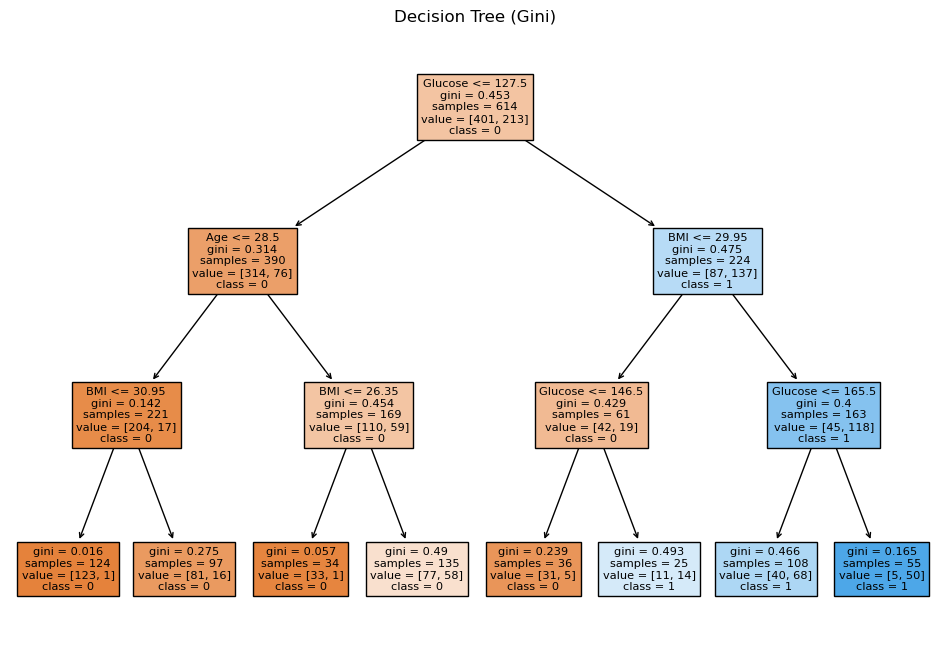

In [189]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, 
                feature_names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"], 
                class_names=['0', '1'],
                filled=True)
plt.title("Decision Tree (Gini)")
plt.show()

# Hasil decision tree dengan menggunakan gini

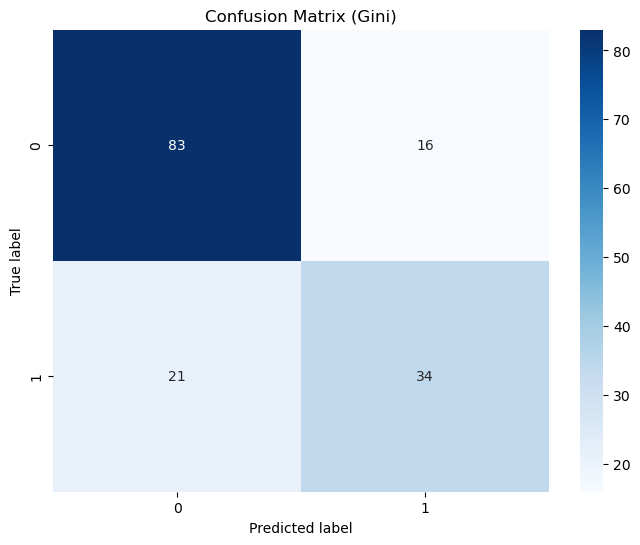

In [190]:
cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Gini)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Confusion matriks dari gini, yang berhasil memprediksi 117 dari 154 data benar.

In [191]:

class_report_gini = classification_report(y_test, y_pred_gini)
print("Classification Report Gini Index: \n", class_report_gini)

# Menampilkan classification report dari gini yang memiliki akurasi 76%

Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



### Naive Bayes

In [192]:
nb = GaussianNB()
nb.fit(X_train, y_train)

# Membuat model naive bayes dan memasukkan X dan y kedalam model yang sudah dibuat

GaussianNB()

In [193]:
y_pred_nb = nb.predict(X_test)

print(f'Accuracy : {accuracy_score(y_test, y_pred_nb)}')

# Memasukkan data ke dalam mobel Naive Bayes dan mendapatkan hasil 77%


Accuracy : 0.7662337662337663


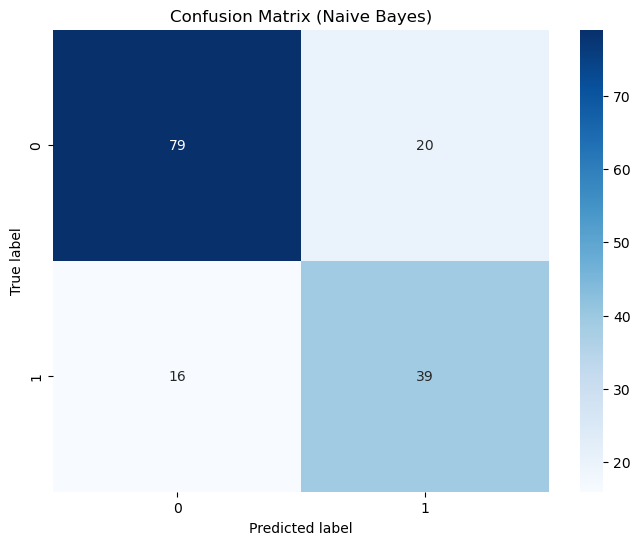

In [194]:

cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Menampilkan heatmap dari modelling naive bayes dan hasilnya model ini dapat memprediksi 118 data dari 154 data benar

In [195]:
print(classification_report(y_test,y_pred_nb))

# Menampilkan classification report dari naive bayes yang memiliki akurasi 77%

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [196]:
# Dari ketiga model di atas, ketiganya memiliki akurasi yang mirip satu sama lain sehingga ketiga model ini tidak ada yang lebih unggul atau lebih buruk secara spesifik.